## Trabajo Práctico 2 - Problema de Empaquetamiento

Curso Buchwald & Genender - 20231C

**Alumnos:**
- Felipe de Luca Andrea - 105646
- Francisco de Luca Andrea - 109794

### Definición del problema
Dado un conjunto de $n$ objetos cuyos tamaños son $\{T_1, T_2, \dotsb , T_n\}$, con $T_i \in (0, 1]$, se debe empaquetarlos usando la mínima
cantidad de envases de capacidad 1.


#### 1. Demostrar que el problema de empaquetamiento es NP-Completo.


El problema de decisión de este problema es el siguiente: 

> Dados $n$ objetos cuyos tamaños son $\{T_1, T_2, \dotsb , T_n\}$, con $T_i \in (0, 1]$, y un número $k$, ¿es posible empaquetarlos en como mucho $k$ envases de capacidad 1?

1. **El problema es NP**

   Dados:
    - Un conjunto de objetos: $T = \{T_1, T_2, \dotsb , T_n\}$, con $T_i \in (0, 1]$
    - Una solución al problema, es decir, un conjunto de envases con los objetos de $T$: $E = \{E_1, E_2, \dotsb, E_k\}$
    - La cantidad de envases: $k = |E|$

    Debemos demostrar que existe un algoritmo polinomial que permita verificar que la soluición $E$ es válida. Es sencillo ver que este algoritmo es polinomial: basta con recorrer todos los envases en $E$ verificando que la suma de los tamaños de los objetos en cada envase sea menor o igual a 1, y que al terminar de recorrer todos los envases, todos los objetos hayan sido empaquetados en exactamente un envase. Esto se puede hacer en tiempo $O(n)$ con el siguiente algoritmo:
    ```
    restantes = set(T)
    for cada envase en E:
        suma = 0
        for cada objeto en envase:
            suma += tamaño del objeto
            if objeto no está en restantes:
                return False
            restantes.remove(objeto)
        if suma > 1:
            return False
    return len(restantes) == 0
    ```
2. **El problema es NP-Completo**

   Habiéndo demostrado que el problema es NP, podemos demostrar que es NP-completo reduciéndo otro problema NP-Completo a este. Para ello, vamos a utilizar el problema de _Balanceo de carga_. Este problema es NP-hard<sup>1</sup> y su problema de decisión es NP-completo<sup>2</sup>. El problema de decisión es:
   
    > Dadas $m'$ máquinas y $n'$ trabajos, y cada trabajo toma tiempo $T_j' \in T'$, ¿es posible asignar los trabajos a las máquinas de forma que el tiempo de ejecución de cada máquina sea menor o igual a k'?
   
   Podemos reducirlo polinoimalmente al problema de empaquetamiento. Notar que, para cualquier conjunto de trabajos $A \subset T'$:
   $$\sum_{t \in A} t \leq k' \Leftrightarrow \sum_{t \in A} \frac{t}{k'} \leq 1$$
   Si evaluamos el problema de empaquetamiento donde los tamaños de cada objeto son  $T_j = \frac{T_j'}{k'}$ en a lo sumo $m'$ envases, tenemos entonces que:
   1. Si el problema de empaquetamiento tiene solución, significa que fue posible asignar los objetos en $m'$ envases de forma tal que la suma en cada uno sea a lo sumo 1. Por lo tanto, si tomamos los trabajos de cada envase y los asignamos a una máquina, el tiempo de ejecución de cada máquina será menor o igual a $k'$, dando como resultado una solución válida del problema de balanceo de carga. 
   $$\text{Empaquetamiento} \Rightarrow \text{Balanceo de carga}$$

   2. De la misma manera, si el problema de balanceo de carga tiene una solución, entonces el problema de empaquetamiento va a tenerla también: se empaquetan los trabajos de cada máquina en un envase, que como sus tiempos suman a lo sumo $k'$, entonces los tamaños de cada envase no superarán 1.
   $$\text{Balanceo de carga} \Rightarrow \text{Empaquetamiento}$$
   
   Los casos donde no hay solución son sus contrarecíprocos.
   
   $$\therefore \; \text{Empaquetamiento} \Leftrightarrow \text{Balanceo de carga}$$

---

1. De acuerdo a las [diapositivas de la cátedra](https://docs.google.com/presentation/d/1m6JJo9rOFg5rjmrHq5EtqVjWz-xMNQKjPChE6MsQRTE/edit#slide=id.g22c7a43fd5e_0_252)
2. El problema de decisión de balanceo de carga $D(k')$ es NP-completo ya que:
   1. El problema de optimización es NP-hard
   2. El problema de decisión es NP: se puede implementar un algoritmo de verificación polinomial. Es, de hecho, el mismo algoritmo que para empaquetamiento solo que recorriendo trabajos en máquinas en vez de objetos en envases, y verificando que la suma sea menor a $k'$ en vez de 1

#### 2. Programar un algoritmo por Backtracking/Fuerza Bruta que busque la solución exacta del problema. Indicar la complejidad del mismo. Realizar mediciones del tiempo de ejecución, y realizar gráficos en función de $n$.


El algoritmo se encuentra en el archivo [`algoritmos/backtracking.py`](algoritmos/backtracking.py). A continuación un ejemplo de su ejecución:

In [87]:
import numpy as np
from algoritmos.backtracking import backtracking
np.random.seed(49)

# El 1-x es para pasar de [0, 1) a (0, 1]
objects =  [round(1 - x, 3) for x in np.random.random(16)]
print(f"Tamaños: {objects}\n")
solution = backtracking(objects, debug=True)
print(f"\nMejor solución: {len(solution)} envases\n{solution}")

Tamaños: [0.699, 0.753, 0.074, 0.108, 0.317, 0.433, 0.453, 0.79, 0.23, 0.104, 0.278, 0.501, 0.558, 0.198, 0.155, 0.771]

Previous best: 16, new best: 8
[[0.699, 0.074, 0.108, 0.104], [0.753, 0.23], [0.317, 0.433, 0.198], [0.453, 0.278, 0.155], [0.79], [0.501], [0.558], [0.771]]
Previous best: 8, new best: 7
[[0.699, 0.074, 0.108, 0.104], [0.753, 0.23], [0.317, 0.433, 0.198], [0.453, 0.501], [0.79, 0.155], [0.278, 0.558], [0.771]]

Mejor solución: 7 envases
[[0.699, 0.074, 0.108, 0.104], [0.753, 0.23], [0.317, 0.433, 0.198], [0.453, 0.501], [0.79, 0.155], [0.278, 0.558], [0.771]]


Para cada paso del invocación recursiva, el algoritmo prueba a poner el objeto en cada uno de los envases existentes y en uno nuevo. Cuando se recorrieron todos los objetos, se llegó a una solución válida y se devuelve la cantidad de paquetes. También se hacen podas que evitan que se siga explorando a una rama si ya se estan usando la misma o más cantidad de paquetes que la mejor solución encontrada hasta el momento, o si la suma de los objetos en el envase actual supera 1.

Una forma sencilla de acotar la complejidad del algoritmo es considerar que la cantidad de paquetes nunca va a ser mayor a la cantidad de objetos. Si consideramos que la cantidad de objetos es $n$, entonces la complejidad del algoritmo es $O(n^n)$ probando todas las combinaciones posibles de objetos en cada paquete. Se puede encontrar una mejor cota considerando que la cantidad de paquetes nunca va a ser mayor a la cantidad de objetos colocados hasta el momento. Por como funciona el algoritmo, el primer objeto siempre se va a colocar en un paquete nuevo, el segundo objeto siempre se va a colocar en un paquete nuevo o en el mismo paquete que el primero, y así sucesivamente. De esta manera procesar el primer objeto requiere 1 operación, procesar el segundo objeto requiere 2 operaciones, procesar el tercer objeto requiere 3 operaciones, y así sucesivamente. Por lo tanto, la complejidad del algoritmo queda acotada por $O(n!)$.


Podemos acotarlo aun mejor. Defino el tiempo que toma el algoritmo como $T(n) = T_n(0, 0)$, donde $T_n$ es la el tiempo del algoritmo recursivo. Dada la cantidad de objetos utilizados hasta el momento $i\in \mathbb{Z}, 0 < i < n$, y la cantidad de paquetes utilizados hasta el momento (menos 1) $j \in \mathbb{Z}, 0 < j < n$, la ecuación de recurrencia del algoritmo $T_n$ (sin considerar las podas) es:
$$
\left\{
    \begin{array}{ll}
        T_n(n, j) = O(1) \\
        T_n(i, j) = j \times T(i + 1, j) + T(i + 1, j + 1) \text{, si } i < n
    \end{array}
\right.
$$

El término de $j \times T(i + 1, j)$ representa los casos donde se intenta poner el objeto en uno de los envases existentes, y el término $T(i + 1, j + 1)$ representa el caso donde se intenta poner el objeto en un nuevo envase.

Definiendo $T'(i, j) = T_n(n-i, j)$, tenemos que $T(n) = T'(n, 0)$ y podemos reescribir la ecuación de recurrencia como:
$$
\left\{
    \begin{array}{ll}
        T_n(0, j) = O(1) \\
        T_n(i, j) = j \times T(i - 1, j) + T(i - 1, j + 1) \text{, si } i > 0
    \end{array}
\right.
$$

Esta ecuación de recurrencia $T'(i, j)$ es da como resultado lo que se conoce como _número de r-Bell_<sup>3</sup> donde $T'(i, j)=O(B_{n, r})$. De esta manera tenemos que $T(n) = T'(n, 0) = O(B_{n, 0}) = O(B_n)$, el enésimo número de Bell. Los números de Bell también se definen con otra ecuación de recurrencia más conocida, $B_{n+1} = \sum\limits_{k=0}^n \binom{n}{k} B_k$. El enésimo número de Bell es el número de particiones de un conjunto de $n$ elementos, es decir, cuantas formas hay de dividir un conjunto de $n$ elementos en subconjuntos no vacíos: es exáctamente lo que hace el algoritmo de backtracking, probar todas las formas de dividir los objetos en envases. Es considerablemente menor que $n!$, y está acotado<sup>4</sup> por $B_n < \left(\frac{0.792n}{ln(n+1)}\right)^n$.

Las mediciones y gráficos se realizan al final del informe.

---

3. [Mezö, I. (2011). "The r-Bell Numbers". _Journal of Integer Sequences_, **14** (11.1.1): pp. 1-14.](https://cs.uwaterloo.ca/journals/JIS/VOL14/Mezo/mezo9.pdf)

   En este paper se menciona la definición de los números de r-Bell y su relación con los números de Bell. en la página 12 se prueba la equivalencia de la definición de los números de r-Bell dada por el paper con la ecuación de recurrencia encontrada para el algoritmo.

4. [Berend, D.; Tassa, T. (2010). "Improved bounds on Bell numbers and on moments of sums of random variables". _Probability and Mathematical Statistics_, **30** (2): 185–205.](https://www.openu.ac.il/lists/mediaserver_documents/personalsites/tamirtassa/lp_moments.pdf)

#### 3. Considerar el siguiente algoritmo: Se abre el primer envase y se empaqueta el primer objeto, luego por cada uno de los objetos restantes se prueba si cabe en el envase actual que está abierto. Si es así, se lo agrega a dicho envase, y se sigue con el siguiente objeto. Si no entra, se cierra el envase actual, se abre uno nuevo que pasa a ser el envase actual, se empaqueta el objeto y se prosigue con el siguiente. <br/> Este algoritmo sirve como una aproximación para resolver el problema de empaquetamiento. Implementar dicho algoritmo, analizar su complejidad, y analizar cuán buena aproximación es. Para esto, considerar lo siguiente: Sea $I$ una instancia cualquiera del problema de empaquetamiento, y $z(I)$ una solución óptima para dicha instancia, y sea $A(I)$ la solución aproximada, se define $\frac{A(I)}{z(I)} \leq r(A)$ para todas las instancias posibles. Calcular $r(A)$ para el algoritmo dado, demostrando que la cota está bien calculada. Realizar mediciones utilizando el algoritmo exacto y la aproximación, con el objetivo de verificar dicha relación.


El algoritmo se encuentra en el archivo [`algoritmos/greedy_consigna.py`](algoritmos/greedy_consigna.py). Tiene complejidad $O(n)$ en tiempo. A continuación un ejemplo de su ejecución:

In [88]:
import numpy as np
from algoritmos.greedy_consigna import greedy_consigna
np.random.seed(49)

objects =  [round(1 - x, 3) for x in np.random.random(16)]
print(f"Tamaños: {objects}")
solution = greedy_consigna(objects)
print(f"\nSolución: {len(solution)} envases\n{solution}")

Tamaños: [0.699, 0.753, 0.074, 0.108, 0.317, 0.433, 0.453, 0.79, 0.23, 0.104, 0.278, 0.501, 0.558, 0.198, 0.155, 0.771]

Solución: 9 envases
[[0.699], [0.753, 0.074, 0.108], [0.317, 0.433], [0.453], [0.79], [0.23, 0.104, 0.278], [0.501], [0.558, 0.198, 0.155], [0.771]]


Dados:
- Un conjunto de objetos: $T = \{T_1, T_2, \dotsb , T_n\}$, con $T_i \in (0, 1]$
- Una solución al problema, es decir, un conjunto de envases con los objetos de $T$: $E = \{E_1, E_2, \dotsb, E_k\}$
- La cantidad de envases: $k = |E|$

La solución óptima sería $z(I)=k$ mínimo, y esta acotada por $z(I) \geq \left\lceil \sum\limits_{t \in T} t \right\rceil \geq \sum\limits_{t \in T} t$, ya que a lo sumo podemos llenar perfectamente $k-1$ envases y poner los objetos restantes en el último. También sabemos que $z(I) \leq n$, ya que la peor solución sería cada objeto en un envase distinto.

El peor caso de esta aproximación sería cuando no pone un objeto en un envase anterior porque no entra. Si pasa para todos los objetos, daría como resultado una solución $A(I) = n$. Para ello, se tiene que dar que $T_i + T_{i+1} > 1$ para todos los objetos consecutivos. Entonces:
$$
z(I) \geq \sum\limits_{t \in T} t = T_1 + T_2 + T_3 + T_4 + \dotsb + T_n > 1 + 1 + \dotsb \\
= \left\{
    \begin{align*}
        &\frac{n}{2} &\text{si n es par} \\
        &\frac{n-1}{2} + T_n &\text{si n es impar}
    \end{align*}
\right.
$$
Notar que para $n$ impar, $z(I) > \frac{n-1}{2} + T_n > \frac{n-1}{2}$. Nunca va a valer exactamente $\frac{n-1}{2}$ por la condición de $T_i + T_{i+1} > 1$ y también porque $T_i > 0$. Como para $n$ impar $\frac{n-1}{2}$ es un entero, tenemos que el mínimo $z(I)$ es el entero siguiente: $z(I) \geq \frac{n-1}{2} + 1 = \frac{n+1}{2} > \frac{n}{2}$. Por lo tanto, vale la misma desigualdad $z(I) > \frac{n}{2}$ para $n$ par e impar.

$$
\Rightarrow z(I) > \frac{n}{2} \Rightarrow \frac{1}{z(I)} < \frac{2}{N} \Rightarrow \frac{A(I)}{z(I)} < 2
$$
$$
\therefore r(A) \leq 2
$$

Las mediciones y gráficos se realizan al final del informe.

#### 4. [Opcional] Implementar alguna otra aproximación (u algoritmo greedy) que les parezca de interés. Comparar sus resultados con los dados por la aproximación del punto 3. Indicar y justificar su complejidad.

El algoritmo propuesto ordena los objetos de mayor a menor y coloca cada objeto en el envase más vacío. Si no entra en ninguno, crea un nuevo envase. La complejidad del algoritmo es $O(n \log n)$ en tiempo, ya que ordena los objetos y luego los recorre una vez realizando operaciones constantes y logarítmicas. Por cada vez que recorre un objeto, busca el envase más vacío. Como son como mucho $n$ envases, esto se hace en $O(log(n))$ utilizando un heap.

Se encuentra en el archivo [`algoritmos/greedy_alternativo.py`](algoritmos/greedy_alternativo.py). A continuación un ejemplo de su ejecución:

In [89]:
import numpy as np
from algoritmos.greedy_alternativo import greedy_alternativo
np.random.seed(49)

objects =  [round(1 - x, 3) for x in np.random.random(16)]
print(f"Tamaños: {objects}")
solution = greedy_alternativo(objects)
print(f"\nSolución: {len(solution)} envases\n{solution}")

Tamaños: [0.699, 0.753, 0.074, 0.108, 0.317, 0.433, 0.453, 0.79, 0.23, 0.104, 0.278, 0.501, 0.558, 0.198, 0.155, 0.771]

Solución: 7 envases
[[0.771, 0.108], [0.699, 0.198], [0.79, 0.104], [0.317, 0.278, 0.23, 0.074], [0.558, 0.433], [0.501, 0.453], [0.753, 0.155]]


#### Comparación de los algoritmos

In [90]:
N_MIN = 10  # Mínima cantidad de objetos con los que probar los algoritmos
N_MAX = 50  # Máxima cantidad de objetos con los que probar los algoritmos
V = 5       # Cantidad de veces que se repite la prueba para cada N
S = 20      # Cantidad de samples entre 0 y N

In [91]:
from typing import Callable, TypeVar
from time import time
import numpy as np
from algoritmos import Algorithm
from algoritmos.backtracking import backtracking
np.random.seed(123)

def log(i, n, s, a):
    print(" " * 100, end="\r")
    print(f"Timing algorithms: {100*(i*V + s)// (V*S)}% (n={n}, sample={s}, algorithm={a})", end="\r")

T = TypeVar("T")
def time_func(func: Callable[[], T]) -> tuple[float, T]:
    """
    Returns the seconds it took to execute func and its return value
    """
    start = time()
    ret = func()
    return time() - start, ret

# Algoritmo -> n objetos -> [V resultados]
Data = dict[Algorithm, dict[int, list[int | float]]]

x = np.linspace(N_MIN, N_MAX, S, dtype=int)
# Resultado obtenido
samples: Data = {a: {i: [] for i in x} for a in Algorithm}
# Tiempo medido
times: Data = {a: {i: [] for i in x} for a in Algorithm}

for i, n in enumerate(x):
    for s in range(V):
        objects = list(1 - np.random.random(n))
        best_approx = None
        for al in (Algorithm.GREEDY, Algorithm.GREEDY_ALT):
            log(i, n, s, al)
            t, solution = time_func(lambda: al.func()(objects))
            samples[al][n].append(len(solution))
            times[al][n].append(t)    
            if best_approx is None or len(solution) < len(best_approx):
                best_approx = solution

        log(i, n, s, Algorithm.EXACT)
        t, solution = time_func(lambda: backtracking(objects, better_than=best_approx))
        samples[Algorithm.EXACT][n].append(len(solution))
        times[Algorithm.EXACT][n].append(t)
        
# clear last log
print(" " * 100, end="\r")
print("Done")

Unexpected exception formatting exception. Falling back to standard exception                       


Traceback (most recent call last):
  File "/home/delu/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_33096/3550054545.py", line 43, in <module>
    t, solution = time_func(lambda: backtracking(objects, better_than=best_approx))
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipykernel_33096/3550054545.py", line 18, in time_func
    ret = func()
          ^^^^^^
  File "/tmp/ipykernel_33096/3550054545.py", line 43, in <lambda>
    t, solution = time_func(lambda: backtracking(objects, better_than=best_approx))
                                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/mnt/D064B76A64B751C8/Documents/Fiuba/7C/Teoría de Algoritmos/TP2/algoritmos/backtracking.py", line 10, in backtracking
    return __backtracking_rec(objects, 0, [], better_than, debug)
           ^^^^^^^^^^^^^^^^^^^^^^^^^

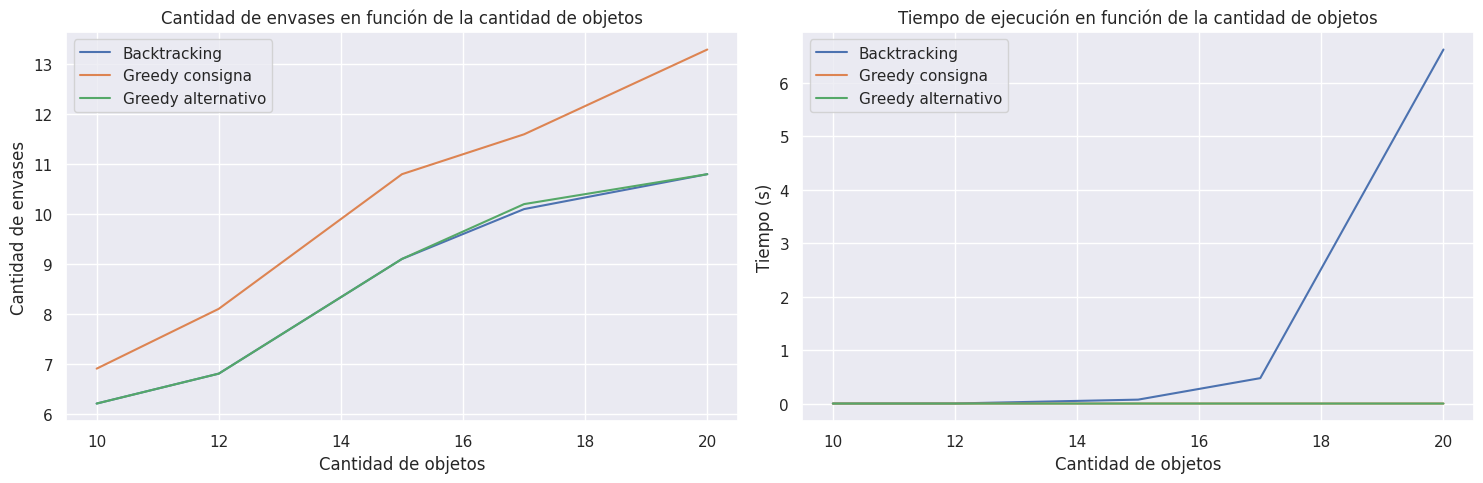

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.set_tight_layout(True)

PlotData = dict[Algorithm, dict[int, float]]
def show(ax: plt.Axes, data: PlotData, y_label: str, title: str):
    for a in data:
        ax.plot(data[a].keys(), data[a].values(), label=str(a))
    ax.set_xlabel("Cantidad de objetos")
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.legend()

def avg(data: dict[int, list[int | float]]) -> dict[int, float]:
    return {x: np.mean(measures) for x, measures in data.items()}

show(ax1, {a: avg(s) for a, s in samples.items()} , "Cantidad de envases", "Cantidad de envases en función de la cantidad de objetos")
show(ax2, {a: avg(s) for a, s in times.items()}, "Tiempo (s)", "Tiempo de ejecución en función de la cantidad de objetos")

Greedy consigna:
	Solución óptima el 14.00% de las veces
	Error máximo del 40.00%
	Error promedio del 18.08%

Greedy alternativo:
	Solución óptima el 98.00% de las veces
	Error máximo del 10.00%
	Error promedio del 0.20%



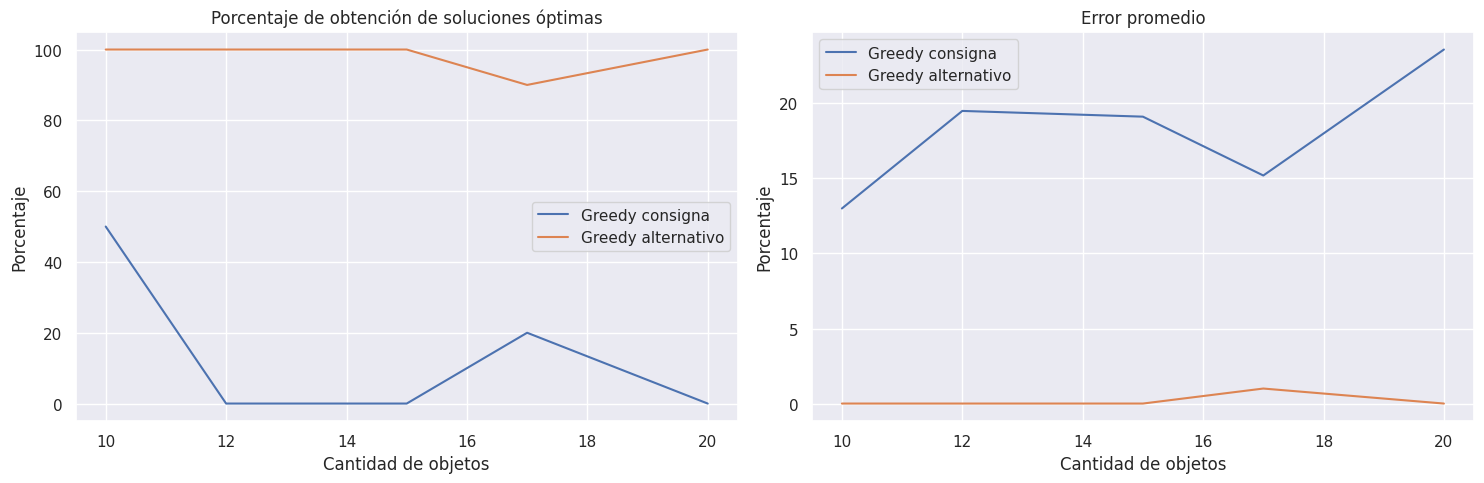

In [ ]:
# Algoritmo -> n objetos -> estadística
right: PlotData = {}
error: PlotData = {}

for a in (Algorithm.GREEDY, Algorithm.GREEDY_ALT):
    r = {n: [100 if s==s_exact else 0 for s, s_exact in zip(samples[a][n], samples[Algorithm.EXACT][n])] for n in x}
    e = {n: [100*(s-s_exact)/s_exact for s, s_exact in zip(samples[a][n], samples[Algorithm.EXACT][n])] for n in x}
    right[a] = avg(r)
    error[a] = avg(e)

    print(f"{a}:")
    print(f"\tSolución óptima el {sum(right[a].values()) / len(x) :.2f}% de las veces")
    print(f"\tError máximo del {max(x for y in e.values() for x in y):.2f}%")
    print(f"\tError promedio del {sum(error[a].values()) / len(x) :.2f}%\n")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.set_tight_layout(True)
show(ax1, right, "Porcentaje", "Porcentaje de obtención de soluciones óptimas")
show(ax2, error, "Porcentaje", "Error promedio")